In [1]:
##################################################################
# # ! Juno Magnetic Modelling using <Vector Potential> with <3 NNs>
# Plot $|J|$ (or other components) predicted by
# `PINN models` on multiple $R_j$
##################################################################
# %%
#  # ! Setup
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [2]:
# %%

#  # ! Data
dataFiles=[
    'output/JUNO_PINN_VP3_PJ01_50_4.0Rj_NN06_040_swish_Adam_DW1_RADk1c0n3000d600_nEpo0012000_BS0010000_Seed67890_EstJned_0.80Rj.txt',\
    'output/JUNO_PINN_VP3_PJ01_50_4.0Rj_NN06_040_swish_Adam_DW1_RADk1c0n3000d600_nEpo0012000_BS0010000_Seed12345_EstJned_1.00Rj.txt',\
    'output/JUNO_PINN_VP3_PJ01_50_4.0Rj_NN06_040_swish_Adam_DW1_RADk1c0n3000d600_nEpo0012000_BS0010000_Seed12345_EstJned_1.50Rj.txt',\
    'output/JUNO_PINN_VP3_PJ01_50_4.0Rj_NN06_040_swish_Adam_DW1_RADk1c0n3000d600_nEpo0012000_BS0010000_Seed12345_EstJned_4.00Rj.txt'
    ]

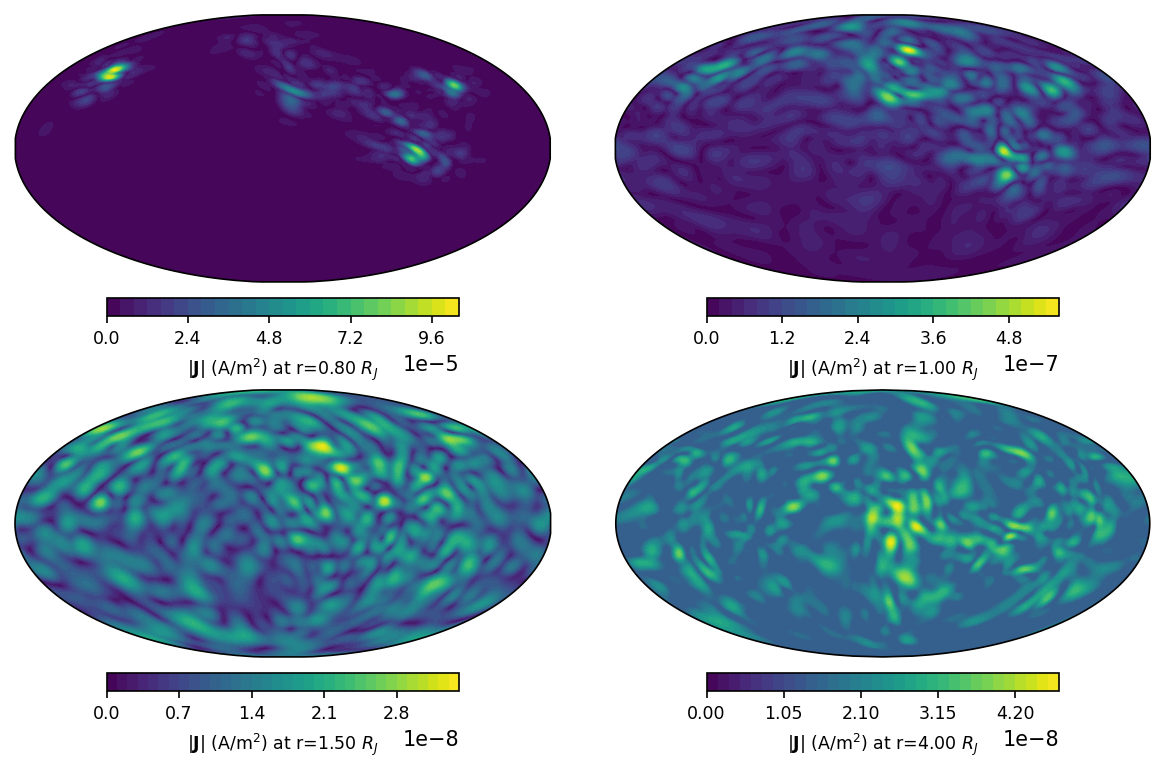

In [3]:
# %%

#  # ! Mapping
# TODO ******************** Parameters ******************** #
RJs = [0.80,1.00,1.50,4.00];  
LambdaP=np.linspace(np.deg2rad(0.5),2*np.pi-np.deg2rad(0.5),360);
ThetaP=np.linspace(np.deg2rad(0.5),np.pi-np.deg2rad(0.5),180); # ! Co-latitude
comp='JNorm';        # Jlambda; Jtheta; Jr; JNorm
# TODO ********************** end ************************* #
LambdaP2d,ThetaP2d = np.meshgrid(LambdaP,ThetaP);
fig1=plt.figure(figsize=(8,5),dpi=150,layout='constrained');
for iFile in range(len(dataFiles)):
    dataJned =np.loadtxt(dataFiles[iFile],skiprows=1);
    Jtheta  = dataJned[:,2:3];
    Jlambda = dataJned[:,3:4];
    Jr      = dataJned[:,4:5];
    JNorm   = dataJned[:,5:6];
    match comp:
        case 'Jlambda':
            strComp='$\mathbf{J}_{\lambda}$';
            dataComp=Jlambda;
        case 'Jtheta':
            strComp='$\mathbf{J}_{\\theta}$';
            dataComp=Jtheta;
        case 'Jr':
            strComp='$\mathbf{J}_{r}$';
            dataComp=Jr;
        case 'JNorm':
            strComp='$|\mathbf{J}|$';
            dataComp=JNorm;
    ax1 = fig1.add_subplot(2,2,iFile+1,projection=ccrs.Mollweide(central_longitude=180));
    Lon=np.flipud(np.rad2deg(LambdaP2d));
    Lat=np.flipud(np.rad2deg(np.pi/2-ThetaP2d));
    zData=np.flipud(np.reshape(dataComp,LambdaP2d.shape));
    # Avoid strange behavior of <cartopy for mollweide> <fix bugs maybe>
    Lon=Lon[1:-1,:]; Lat=Lat[1:-1,:];zData=zData[1:-1,:];
    ctf1=ax1.contourf(Lon,Lat,zData,levels=32, cmap='viridis',\
        transform=ccrs.PlateCarree());
    # ! Draw all colorbars
    cb1=fig1.colorbar(ctf1,shrink=0.6,location='bottom');
    cb1.ax.locator_params(nbins=5);  
    cb1.ax.tick_params(labelsize='small');
    cbLabel = strComp + ' (A/m$^2$) at r=%.2f $R_{J}$'%(RJs[iFile]);
    cb1.set_label(cbLabel,fontsize='small');
plt.savefig('Fig5.png',dpi=300,bbox_inches='tight');   
plt.show();